In [6]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize
1. File path where the input data files reside.
2. Dictionary of major airports consisting of IATA airport codes and airport city names

In [7]:
# Assign the directory of the input data files to a variable
input_data_path = 'Resources/'

# Since we are only interested in data related to major airports, create a dictionary of major
# airports. For later, it is helpful to have the IATA code and the city name.
major_airports = {'ATL': 'Atlanta',
                  'AUS': 'Austin',
                  'BNA': 'Nashville',
                  'BOS': 'Boston',
                  'BWI': 'Baltimore',
                  'CLT': 'Charlotte',
                  'DCA': 'Washington/National',
                  'DEN': 'Denver',
                  'DFW': 'Dallas/Ft. Worth',
                  'DTW': 'Detroit',
                  'EWR': 'Newark',
                  'FLL': 'Ft. Lauderdale',
                  'IAD': 'Washington/Dulles',
                  'IAH': 'Houston',
                  'JFK': 'New York/JFK',
                  'LAS': 'Las Vegas',
                  'LAX': 'Los Angeles',
                  'LGA': 'New York/LaGuardia',
                  'MCO': 'Orlando',
                  'MDW': 'Chicago/Midway',
                  'MIA': 'Miami',
                  'MSP': 'Minneapolis/St. Paul',
                  'ORD': "Chicago/O'Hare",
                  'PHL': 'Philadelphia',
                  'PHX': 'Phoenix',
                  'SAN': 'San Diego',
                  'SEA': 'Seattle',
                  'SFO': 'San Francisco',
                  'SLC': 'Salt Lake City',
                  'TPA': 'Tampa'}


# Step 1: Import flight data

In [8]:
# Create a list that contains the flights file names
flights_files = glob.glob(f'{input_data_path}On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_*.csv')

# for file in flights_files:
#     print(file)

In [9]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all flights from
# 01/01/2018 to 12/31/2023.
flights_dataframes = []

# Loop over the files in the flight files list and process the data in each file
# i = 0
for file in flights_files:

    # Read the file into a DataFrame
    print(f'Processing file {file}...')
    try:
        df = pd.read_csv(f'{file}', low_memory=False)
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Strip out any leading or trailing whitespace from column names and make sure columns
    # are lower case
    df.rename(columns = {name:name.strip().lower() for name in df.columns}, inplace=True)

    # # Keep only flights that arrive at one of the major airports
    # df = df.loc[df['dest'].isin(major_airports.keys())]

    # Assign list of columns to keep for later
    columns_to_keep = ['year',
                       'quarter',
                       'month',
                       'dayofmonth',
                       'dayofweek',
                       'flightdate',
                       'iata_code_marketing_airline',
                       'flight_number_marketing_airline',
                       'operating_airline',
                       'iata_code_operating_airline',
                       'flight_number_operating_airline',
                       'origin',
                       'origincityname',
                       'originstate',
                       'dest',
                       'destcityname',
                       'deststate',
                       'depdelay',
                       'depdelayminutes',
                       'arrdelay',
                       'arrdelayminutes',
                       'cancelled',
                       'cancellationcode']
    
    # Keep only columns we want to keep for later
    # Keep only flights (rows) that arrive at one of the major airports
    df = df[columns_to_keep].loc[df['dest'].isin(major_airports.keys())]

    # Append current DataFrame to list of DataFrames
    flights_dataframes.append(df)

    # if i < 3:
    #     print(f'Dataframe for input file {file}:')
    #     print(f'Shape: {flights_dataframes[i].shape}')
    #     print('First five rows')
    #     display(flights_dataframes[i].head())
    #     print('Last five rows')
    #     display(flights_dataframes[i].tail())
    #     print('\n' + '='*300 + '\n')

    # i += 1

# Concatenate all DataFrames into a big DataFrame and reset the index
df_flights = pd.concat(flights_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_flights.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_flights.iloc[397076:397086, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_flights.iloc[823480:823490, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_flights.tail())
# print(f'Shape of concatenated DataFrame: {df_flights.shape}')

# display(df.tail())
display(df_flights.tail())
display(df_flights.columns)

Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_2.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_4.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2023_12.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_12.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2020_1.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2019_5.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_3.csv...
   Success.
Processing file Resources/On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2022_1.csv...
   Success.
Processing fil

KeyboardInterrupt: 

In [ ]:
# Convert 'flightdate' to datetime
df_flights['flightdate'] = pd.to_datetime(df_flights['flightdate'], format='mixed')

# Convert 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek' to integers. This will help with sorting, especially by month.
df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']] = df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']].astype(int)
display(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26403684 entries, 0 to 26403683
Data columns (total 23 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   year                             int32         
 1   quarter                          int32         
 2   month                            int32         
 3   dayofmonth                       int32         
 4   dayofweek                        int32         
 5   flightdate                       datetime64[ns]
 6   iata_code_marketing_airline      object        
 7   flight_number_marketing_airline  int64         
 8   operating_airline                object        
 9   iata_code_operating_airline      object        
 10  flight_number_operating_airline  int64         
 11  origin                           object        
 12  origincityname                   object        
 13  originstate                      object        
 14  dest                            

None

# Step 2: Import passenger enplanement data

In [ ]:
# Create a list of the input files that contain passengers data
passengers_files = glob.glob(f'{input_data_path}*_Passengers_*.csv')

# for file in passengers_files:
#     print(file)

In [ ]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all monthly passenger
# enplanements from January 2018 to December 2023.
passengers_dataframes = []

# Loop over the files in the passengers files list and process the data in each file
# i = 0
for file in passengers_files:

    # Read the passengers file into a DataFrame.
    # Skip the first row in each file since it is a header row we do not need
    print(f'Processing file {file}...')
    # Retrieve IATA airport code from filename
    airport = file[len(input_data_path):len(input_data_path)+3]
    # print(airport)

    # Make sure airport is a major airport (is in the dictionary of major airports)
    if airport in major_airports.keys():
        try:
            df = pd.read_csv(f'{file}',
                             skiprows=1,
                             engine='python')
            print('   Success.')
        except Exception as error:
            print('   Read failed.')
            print('   Error:', error)

        # Keep only columns 'Year', 'Month', and 'Domestic' (for domestic passengers)
        # Keep only rows where the value of the 'Month' field is not equal to 'TOTAL',
        # the 'Year' has a numeric value and is larger than 2017
        df = df[['Year', 'Month', 'DOMESTIC']][(df['Month'] != 'TOTAL') &
                                               (df['Year'].str.isnumeric() == True) &
                                               (df['Year'] > '2017')]
        
        # Add a column called 'Origin' containing the origin airport IATA code
        df['Origin'] = airport

        # Append current DataFrame to list of DataFrames
        passengers_dataframes.append(df)

        # if (airport == 'ATL') or (airport == 'AUS') or (airport == 'BNA'):
        #     print(f'Dataframe of file {file}:')
        #     print(f'Shape: {passengers_dataframes[i].shape}')
        #     print('First five rows')
        #     display(passengers_dataframes[i].head())
        #     print('Last five rows')
        #     display(passengers_dataframes[i].tail())
        #     print('\n' + '='*300 + '\n')

        # i += 1
    else:
        print(f'The airport {airport} was not found.')

# Concatenate all DataFrames into a big DataFrame and reset the index
df_passengers = pd.concat(passengers_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_passengers.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_passengers.iloc[67:77, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_passengers.iloc[139:149, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_passengers.tail())
# print(f'Shape of concatenated DataFrame: {df_passengers.shape}')

display(df.tail())
display(df_passengers.tail())
display(df_passengers.shape)
display(df_passengers.columns)

Processing file Resources\ATL_Passengers_4_10_2024 1_20_52 PM.csv...
   Success.
Processing file Resources\AUS_Passengers_4_10_2024 2_18_16 PM.csv...
   Success.
Processing file Resources\BNA_Passengers_4_10_2024 2_21_25 PM.csv...
   Success.
Processing file Resources\BOS_Passengers_4_10_2024 1_58_33 PM.csv...
   Success.
Processing file Resources\BWI_Passengers_4_10_2024 2_15_11 PM.csv...
   Success.
Processing file Resources\CLT_Passengers_4_10_2024 1_48_19 PM.csv...
   Success.
Processing file Resources\DCA_Passengers_4_10_2024 2_11_18 PM.csv...
   Success.
Processing file Resources\DEN_Passengers_4_10_2024 1_34_52 PM.csv...
   Success.
Processing file Resources\DFW_Passengers_4_10_2024 1_25_49 PM.csv...
   Success.
Processing file Resources\DTW_Passengers_4_10_2024 2_06_01 PM.csv...
   Success.
Processing file Resources\EWR_Passengers_4_10_2024 1_53_01 PM.csv...
   Success.
Processing file Resources\FLL_Passengers_4_10_2024 2_01_28 PM.csv...
   Success.
Processing file Resources\IA

,Year,Month,DOMESTIC,Origin
271,2023,8,"803,898",TPA
272,2023,9,"789,879",TPA
273,2023,10,"914,515",TPA
274,2023,11,"956,988",TPA
275,2023,12,"982,672",TPA


,Year,Month,DOMESTIC,Origin
2155,2023,8,"803,898",TPA
2156,2023,9,"789,879",TPA
2157,2023,10,"914,515",TPA
2158,2023,11,"956,988",TPA
2159,2023,12,"982,672",TPA


(2160, 4)

Index(['Year', 'Month', 'DOMESTIC', 'Origin'], dtype='object')

In [ ]:
# Convert 'Year' and 'Month' to integers. This will help with proper sorting, especially by month.
df_passengers[['Year', 'Month']] = df_passengers[['Year', 'Month']].astype(int)
display(df_passengers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int32 
 1   Month     2160 non-null   int32 
 2   DOMESTIC  2160 non-null   object
 3   Origin    2160 non-null   object
dtypes: int32(2), object(2)
memory usage: 50.8+ KB


None

In [ ]:
# df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].astype(str)
display(df_passengers.head())
df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].str.replace(",", "")
display(df_passengers.head())

df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].astype(int)
display(df_passengers.info())
display(df_passengers.head())

,Year,Month,DOMESTIC,Origin
0,2018,1,"3,232,202",ATL
1,2018,2,"3,204,716",ATL
2,2018,3,"3,965,168",ATL
3,2018,4,"3,844,151",ATL
4,2018,5,"4,081,926",ATL


,Year,Month,DOMESTIC,Origin
0,2018,1,3232202,ATL
1,2018,2,3204716,ATL
2,2018,3,3965168,ATL
3,2018,4,3844151,ATL
4,2018,5,4081926,ATL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int32 
 1   Month     2160 non-null   int32 
 2   DOMESTIC  2160 non-null   int32 
 3   Origin    2160 non-null   object
dtypes: int32(3), object(1)
memory usage: 42.3+ KB


None

,Year,Month,DOMESTIC,Origin
0,2018,1,3232202,ATL
1,2018,2,3204716,ATL
2,2018,3,3965168,ATL
3,2018,4,3844151,ATL
4,2018,5,4081926,ATL


# Step 3: Import Fare data

In [ ]:
# Create a list of the input files that contain fares data
fares_files = glob.glob(f'{input_data_path}AverageFare_Q*.csv')

# for file in fares_files:
#     print(file)

In [ ]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all quarterly fare
# averages from Q1 2018 to Q3 2023.
fares_dataframes = []

# Loop over the files in the fares files list and process the data in each file
# i = 0
for file in fares_files:

    # Read the fares file into a DataFrame.
    print(f'Processing file {file}...')

    try:
        df = pd.read_csv(f'{file}')
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Keep only columns 'Quarter', 'Year', 'Airport Code', 'City Name',
    # 'Average Fare ($)', 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'
    # Keep only fares (rows) that arrive at one of the major airports
    df = df[['Quarter',
            'Year',
            'Airport Code',
            'City Name',
            'Average Fare ($)',
            'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)']].loc[df['Airport Code'].isin(major_airports.keys())]
    
    # Append current DataFrame to list of DataFrames
    fares_dataframes.append(df)

    # if i<3:
    #     print(f'Dataframe of file {file}:')
    #     print(f'Shape: {fares_dataframes[i].shape}')
    #     print('First five rows')
    #     display(fares_dataframes[i].head())
    #     print('Last five rows')
    #     display(fares_dataframes[i].tail())
    #     print('\n' + '='*300 + '\n')

    # i += 1

# Concatenate all DataFrames into a big DataFrame and reset the index
df_fares = pd.concat(fares_dataframes).reset_index(drop=True)

# print('\n' + '+'*300 + '\n')
# print('+'*300 + '\n')
# print('Concatenated DataFrame:')
# print('First five lines:')
# display(df_fares.head())
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 0 and beginning of DataFrame 1:')
# display(df_fares.iloc[25:35, :])
# print('\n' + '='*300 + '\n')
# print('End of DataFrame 1 and beginning of DataFrame 2:')
# display(df_fares.iloc[55:65, :])
# print('\n' + '='*300 + '\n')
# print('End of concatenated DataFrame:')
# display(df_fares.tail())
# print(f'Shape of concatenated DataFrame: {df_fares.shape}')

display(df.tail())
display(df_fares.tail())
display(df_fares.shape)
display(df_fares.columns)

Processing file Resources\AverageFare_Q1_2018.csv...
   Success.
Processing file Resources\AverageFare_Q1_2019.csv...
   Success.
Processing file Resources\AverageFare_Q1_2020.csv...
   Success.
Processing file Resources\AverageFare_Q1_2021.csv...
   Success.
Processing file Resources\AverageFare_Q1_2022.csv...
   Success.
Processing file Resources\AverageFare_Q1_2023.csv...
   Success.
Processing file Resources\AverageFare_Q2_2018.csv...
   Success.
Processing file Resources\AverageFare_Q2_2019.csv...
   Success.
Processing file Resources\AverageFare_Q2_2020.csv...
   Success.
Processing file Resources\AverageFare_Q2_2021.csv...
   Success.
Processing file Resources\AverageFare_Q2_2022.csv...
   Success.
Processing file Resources\AverageFare_Q2_2023.csv...
   Success.
Processing file Resources\AverageFare_Q3_2018.csv...
   Success.
Processing file Resources\AverageFare_Q3_2019.csv...
   Success.
Processing file Resources\AverageFare_Q3_2020.csv...
   Success.
Processing file Resources

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)
26,4.0,2022.0,BNA,Nashville,349.47,360.43
27,4.0,2022.0,SLC,Salt Lake City,439.50,453.28
28,4.0,2022.0,CLT,Charlotte,468.61,483.31
32,4.0,2022.0,MDW,Chicago-Midway,301.63,311.09
35,4.0,2022.0,IAD,Washington-Dulles,503.53,519.32


,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)
685,4.0,2022.0,BNA,Nashville,349.47,360.43
686,4.0,2022.0,SLC,Salt Lake City,439.50,453.28
687,4.0,2022.0,CLT,Charlotte,468.61,483.31
688,4.0,2022.0,MDW,Chicago-Midway,301.63,311.09
689,4.0,2022.0,IAD,Washington-Dulles,503.53,519.32


(690, 6)

Index(['Quarter', 'Year', 'Airport Code', 'City Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'],
      dtype='object')

In [ ]:
# Rename the column 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)' to 'Inflation Adjusted Average Fare ($)'
df_fares = df_fares.rename(columns={'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)':
                                        'Inflation Adjusted Average Fare ($)'})

In [ ]:
# Convert columns 'Quarter' and 'Year' into integers
df_fares[['Quarter', 'Year']] = df_fares[['Quarter', 'Year']].astype(int)

display(df_fares.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Quarter                              690 non-null    int32  
 1   Year                                 690 non-null    int32  
 2   Airport Code                         690 non-null    object 
 3   City Name                            690 non-null    object 
 4   Average Fare ($)                     690 non-null    float64
 5   Inflation Adjusted Average Fare ($)  690 non-null    float64
dtypes: float64(2), int32(2), object(2)
memory usage: 27.1+ KB


None

# Step 4: Raw flights data consistency checks

In [ ]:
# Count the number of values in each column of the 'df_flights' DataFrame
display(df_flights.count())
# The maximum of the column count values is equal to the total number of flights
# in our dataset
total_flights = max(df_flights.count())
print(f'Total number of flights: {total_flights:,}.')

year                               26403684
quarter                            26403684
month                              26403684
dayofmonth                         26403684
dayofweek                          26403684
flightdate                         26403684
iata_code_marketing_airline        26403684
flight_number_marketing_airline    26403684
operating_airline                  26403684
iata_code_operating_airline        26403684
flight_number_operating_airline    26403684
origin                             26403684
origincityname                     26403684
originstate                        26403684
dest                               26403684
destcityname                       26403684
deststate                          26403684
depdelay                           25797301
depdelayminutes                    25797301
arrdelay                           25722109
arrdelayminutes                    25722109
cancelled                          26403684
cancellationcode                

Total number of flights: 26,403,684.


Since the passenger enplanement raw data is aggregated by airport, year, and month
we need to aggregate the flights data by airport, year, and month as well, so we can
properly correlate the data from different sources.

> [!NOTE]: As customers we are interested in arrival delays more than departure delays.
>          Therefore, we are picking the destination airport, 'dest', in our aggregation.

In [ ]:
# Find the counts
df_flights_summary = df_flights.groupby(['year', 'month', 'dest']).count()
display(df_flights_summary.head())

# Perform consistency check: If we sum over the aggregation, we should get back the
# values obtained using the 'count()' function above. The index columns are not shown.
display(df_flights_summary.sum())

# Through manual inspection we can convice ourselves that our expectation is met.

quarter  dayofmonth  dayofweek  flightdate  \
year month dest                                               
2018 1     ATL     30730       30730      30730       30730   
           AUS      4713        4713       4713        4713   
           BNA      5789        5789       5789        5789   
           BOS     11306       11306      11306       11306   
           BWI      8560        8560       8560        8560   

                 iata_code_marketing_airline  flight_number_marketing_airline  \
year month dest                                                                 
2018 1     ATL                         30730                            30730   
           AUS                          4713                             4713   
           BNA                          5789                             5789   
           BOS                         11306                            11306   
           BWI                          8560                             8560   

                 operating_airline  iata_code_operating_airline  \
year month dest                                                   
2018 1     ATL               30730                        30730   
           AUS                4713                         4713   
           BNA                5789                         5789   
           BOS               11306                        11306   
           BWI                8560                         8560   

                 flight_number_operating_airline  origin  origincityname  \
year month dest                                                            
2018 1     ATL                             30730   30730           30730   
           AUS                              4713    4713            4713   
           BNA                              5789    5789            5789   
           BOS                             11306   11306           11306   
           BWI                              8560    8560            8560   

                 originstate  destcityname  deststate  depdelay  \
year month dest                                                   
2018 1     ATL         30730         30730      30730     29865   
           AUS          4713          4713       4713      4611   
           BNA          5789          5789       5789      5613   
           BOS         11306         11306      11306     10507   
           BWI          8560          8560       8560      8342   

                 depdelayminutes  arrdelay  arrdelayminutes  cancelled  \
year month dest                                                          
2018 1     ATL             29865     29833            29833      30730   
           AUS              4611      4607             4607       4713   
           BNA              5613      5595             5595       5789   
           BOS             10507     10492            10492      11306   
           BWI              8342      8333             8333       8560   

                 cancellationcode  
year month dest                    
2018 1     ATL                882  
           AUS                102  
           BNA                179  
           BOS                805  
           BWI                220

quarter                            26403684
dayofmonth                         26403684
dayofweek                          26403684
flightdate                         26403684
iata_code_marketing_airline        26403684
flight_number_marketing_airline    26403684
operating_airline                  26403684
iata_code_operating_airline        26403684
flight_number_operating_airline    26403684
origin                             26403684
origincityname                     26403684
originstate                        26403684
destcityname                       26403684
deststate                          26403684
depdelay                           25797301
depdelayminutes                    25797301
arrdelay                           25722109
arrdelayminutes                    25722109
cancelled                          26403684
cancellationcode                     618356
dtype: int64

Determine the number of flights by airport per year and month.
We can use any column that has a value count equal to 'total_flights' in the 'df_flights'
DataFrame. We are picking 'flight_number_marketing_airline'.

In [ ]:
# Sort the data by index to make sure it lines up properly when we combine it with passenger
# data
df_flights_summary = df_flights_summary[['flight_number_marketing_airline']].sort_index()
# df_flights_exploration.sort_index()
display(df_flights_summary.head())
display(df_flights_summary.tail())

flight_number_marketing_airline
year month dest                                 
2018 1     ATL                             30730
           AUS                              4713
           BNA                              5789
           BOS                             11306
           BWI                              8560

flight_number_marketing_airline
year month dest                                 
2023 12    SAN                              7898
           SEA                             14043
           SFO                             11289
           SLC                              9361
           TPA                              7261

In [ ]:
# Determine the number of records. It should be #years * #months per year * #airports.
# In our case, 6*12*30=2160. That is what we get.
df_flights_summary.count()

flight_number_marketing_airline    2160
dtype: int64

# Step 5: Prepare a Summary DataFrame for Visualization

In [ ]:
# Rename the column to something more meaningful
df_flights_summary = df_flights_summary.rename(columns={'flight_number_marketing_airline': 'No. of Flights'})

In [ ]:
# Calculate the average delay on arrival in minutes by year, month and arrival airport, round to two digits, and sort.
df_arrdelay_mean = df_flights[['year', 'month', 'dest', 'arrdelayminutes']].groupby(['year', 'month', 'dest']).mean().round(2).sort_index()
display(df_arrdelay_mean.head())
display(df_arrdelay_mean.tail())

# Add average delay on arrival to the DataFrame
df_flights_summary['Average Delay (Minutes)'] = df_arrdelay_mean['arrdelayminutes']
display(df_flights_summary.head())
display(df_flights_summary.tail())

arrdelayminutes
year month dest                 
2018 1     ATL             14.58
           AUS              8.97
           BNA             11.02
           BOS             18.42
           BWI              9.09

arrdelayminutes
year month dest                 
2023 12    SAN              7.50
           SEA              9.45
           SFO             15.41
           SLC              9.07
           TPA             13.81

No. of Flights  Average Delay (Minutes)
year month dest                                         
2018 1     ATL            30730                    14.58
           AUS             4713                     8.97
           BNA             5789                    11.02
           BOS            11306                    18.42
           BWI             8560                     9.09

No. of Flights  Average Delay (Minutes)
year month dest                                         
2023 12    SAN             7898                     7.50
           SEA            14043                     9.45
           SFO            11289                    15.41
           SLC             9361                     9.07
           TPA             7261                    13.81

In [ ]:
# Calculate cancellations by year, month, and airport. To calculate the
# cancellations we sum over the 'cancelled' column of the 'df_flights' DataFrame
# since, according to the data dictionary, it has a value of 1 when a flight is
# cancelled and a value of 0 if it is not cancelled.
# Also, convert the number of cancellations to integer and sort by index.
df_cancelled = df_flights[['year', 'month', 'dest', 'cancelled']].groupby(['year', 'month', 'dest']).sum().astype(int).sort_index()
display(df_cancelled.head())
display(df_cancelled.tail())

# Add the cancellations to the summary DataFrame
df_flights_summary['Cancelled Flights'] = df_cancelled['cancelled']
display(df_flights_summary.head())
display(df_flights_summary.tail())

cancelled
year month dest           
2018 1     ATL         882
           AUS         102
           BNA         179
           BOS         805
           BWI         220

cancelled
year month dest           
2023 12    SAN          24
           SEA         109
           SFO          38
           SLC          16
           TPA          25

No. of Flights  Average Delay (Minutes)  Cancelled Flights
year month dest                                                            
2018 1     ATL            30730                    14.58                882
           AUS             4713                     8.97                102
           BNA             5789                    11.02                179
           BOS            11306                    18.42                805
           BWI             8560                     9.09                220

No. of Flights  Average Delay (Minutes)  Cancelled Flights
year month dest                                                            
2023 12    SAN             7898                     7.50                 24
           SEA            14043                     9.45                109
           SFO            11289                    15.41                 38
           SLC             9361                     9.07                 16
           TPA             7261                    13.81                 25

In [ ]:
# Calculate the percentage of flights cancelled to allow for an easy comparison across airports, months, and years.
df_flights_summary['Cancelled %'] = df_flights_summary['Cancelled Flights']/df_flights_summary['No. of Flights']*100

display(df_flights_summary.head())
display(df_flights_summary.count())

No. of Flights  Average Delay (Minutes)  Cancelled Flights  \
year month dest                                                               
2018 1     ATL            30730                    14.58                882   
           AUS             4713                     8.97                102   
           BNA             5789                    11.02                179   
           BOS            11306                    18.42                805   
           BWI             8560                     9.09                220   

                 Cancelled %  
year month dest               
2018 1     ATL      2.870159  
           AUS      2.164227  
           BNA      3.092071  
           BOS      7.120113  
           BWI      2.570093

No. of Flights             2160
Average Delay (Minutes)    2160
Cancelled Flights          2160
Cancelled %                2160
dtype: int64

Add the number of passengers from the 'df_passengers' DataFrame. Note that it
has the same number of records as the 'df_flights_summary' DataFrame.
So, if we set the index of the 'df_passenger' DataFrame the same as the 'df_flights_summary'
DataFrame and sort the same way we can just copy the columns with the passenger numbers
into a new column in 'df_flights_summary'.

In [ ]:
# Set the (multi) index and sort
display(df_passengers.head())
df_passengers = df_passengers.set_index(['Year', 'Month', 'Origin']).sort_index()
display(df_passengers.head())
display(df_passengers.tail())

df_flights_summary['Enplaned Passengers'] = df_passengers['DOMESTIC']
display(df_flights_summary.head())
display(df_flights_summary.tail())

,Year,Month,DOMESTIC,Origin
0,2018,1,3232202,ATL
1,2018,2,3204716,ATL
2,2018,3,3965168,ATL
3,2018,4,3844151,ATL
4,2018,5,4081926,ATL


DOMESTIC
Year Month Origin          
2018 1     ATL      3232202
           AUS       483324
           BNA       483139
           BOS      1027783
           BWI       882892

DOMESTIC
Year Month Origin          
2023 12    SAN       982726
           SEA      1658110
           SFO      1446506
           SLC       979522
           TPA       982672

No. of Flights  Average Delay (Minutes)  Cancelled Flights  \
year month dest                                                               
2018 1     ATL            30730                    14.58                882   
           AUS             4713                     8.97                102   
           BNA             5789                    11.02                179   
           BOS            11306                    18.42                805   
           BWI             8560                     9.09                220   

                 Cancelled %  Enplaned Passengers  
year month dest                                    
2018 1     ATL      2.870159              3232202  
           AUS      2.164227               483324  
           BNA      3.092071               483139  
           BOS      7.120113              1027783  
           BWI      2.570093               882892

No. of Flights  Average Delay (Minutes)  Cancelled Flights  \
year month dest                                                               
2023 12    SAN             7898                     7.50                 24   
           SEA            14043                     9.45                109   
           SFO            11289                    15.41                 38   
           SLC             9361                     9.07                 16   
           TPA             7261                    13.81                 25   

                 Cancelled %  Enplaned Passengers  
year month dest                                    
2023 12    SAN      0.303874               982726  
           SEA      0.776187              1658110  
           SFO      0.336611              1446506  
           SLC      0.170922               979522  
           TPA      0.344305               982672

The fares are only available by quarter, however, our other data is available by month.
Therefore, we will add a column for the month to the fares dataframe and use the data
for the quarter for each month in that quarter.

In [ ]:
# Replicate each row three times since each quarter consists of three months
df_fares_monthly = pd.DataFrame(np.repeat(df_fares.values, 3, axis=0))

# Since this did not preserve the column labels, add them back
df_fares_monthly.columns = df_fares.columns
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,1,2018,LAX,Los Angeles,336.93,415.52
1,1,2018,LAX,Los Angeles,336.93,415.52
2,1,2018,LAX,Los Angeles,336.93,415.52
3,1,2018,ORD,Chicago-O'Hare,341.14,420.71
4,1,2018,ORD,Chicago-O'Hare,341.14,420.71


In [ ]:
# Sort by year and quarter
df_fares_monthly.sort_values(by=['Year', 'Quarter'], inplace=True)
display(df_fares_monthly.head())
display(df_fares_monthly.shape)

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,1,2018,LAX,Los Angeles,336.93,415.52
1,1,2018,LAX,Los Angeles,336.93,415.52
2,1,2018,LAX,Los Angeles,336.93,415.52
3,1,2018,ORD,Chicago-O'Hare,341.14,420.71
4,1,2018,ORD,Chicago-O'Hare,341.14,420.71


(2070, 6)

Create a list of months

In [ ]:
# Set a list of quarters equal to the 'Quarter' column in 'df_fares_monthly'
quarters = df_fares_monthly['Quarter'].to_list()

# Initialize a list for the months
months = []

# Loop over the list of quarters and create a list of months.
# The month is given by the remainder of dividing the index by three
# (giving 0, 1, 2) and adding 1 for Q1, 4 for Q2, 7 for Q3, and 10 for Q4.
# The set of numbers 1, 4, 7, and 10 is calculated by adding one to the product
# of the quarter number minus 1 and three.
for i in range(len(quarters)):
    months.append(i%3+((quarters[i]-1)*3+1))
    # print(f'Index: {i}, Quarter: {quarters[i]} Month: {months[i]}')

# Add the list of months as a column to the 'df_fares_monthly' dataframe.
df_fares_monthly['Month'] = months
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),Month
0,1,2018,LAX,Los Angeles,336.93,415.52,1
1,1,2018,LAX,Los Angeles,336.93,415.52,2
2,1,2018,LAX,Los Angeles,336.93,415.52,3
3,1,2018,ORD,Chicago-O'Hare,341.14,420.71,1
4,1,2018,ORD,Chicago-O'Hare,341.14,420.71,2


In [ ]:
# Drop the 'Quarter' column and rearrange the columns
df_fares_monthly = df_fares_monthly[['Year',
                                     'Month',
                                     'Airport Code',
                                     'City Name',
                                     'Average Fare ($)',
                                     'Inflation Adjusted Average Fare ($)'
                                   ]]
display(df_fares_monthly.head())


,Year,Month,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1,LAX,Los Angeles,336.93,415.52
1,2018,2,LAX,Los Angeles,336.93,415.52
2,2018,3,LAX,Los Angeles,336.93,415.52
3,2018,1,ORD,Chicago-O'Hare,341.14,420.71
4,2018,2,ORD,Chicago-O'Hare,341.14,420.71


In [ ]:
# Prepare the 'df_flights_summary' DataFrame for merger with the 'df_fares_monthly'
# Dataframe by
#   * Resetting the index and
#   * Renaming the 'year', 'month', and 'dest' columns to 'Year', 'Month', and
#     'Airport Code'
df_flights_summary = df_flights_summary.reset_index()
df_flights_summary = df_flights_summary.rename(columns = {'year': 'Year',
                                                          'month': 'Month',
                                                          'dest': 'Airport Code'})
display(df_flights_summary.head())

,Year,Month,Airport Code,No. of Flights,Average Delay (Minutes),Cancelled Flights,Cancelled %,Enplaned Passengers
0,2018,1,ATL,30730,14.58,882,2.870159,3232202
1,2018,1,AUS,4713,8.97,102,2.164227,483324
2,2018,1,BNA,5789,11.02,179,3.092071,483139
3,2018,1,BOS,11306,18.42,805,7.120113,1027783
4,2018,1,BWI,8560,9.09,220,2.570093,882892


In [ ]:
# Merge the 'df_fares_monthly' DataFrame and the 'df_flights_summary' DataFrame
# into the final summary DataFrame
df_summary = pd.merge(df_flights_summary, df_fares_monthly,
                      how='left',
                      left_on=['Year', 'Month', 'Airport Code'],
                      right_on=['Year', 'Month', 'Airport Code'])

display(df_summary.head())
display(df_summary.tail())

,Year,Month,Airport Code,No. of Flights,Average Delay (Minutes),Cancelled Flights,Cancelled %,Enplaned Passengers,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1,ATL,30730,14.58,882,2.870159,3232202,Atlanta,361.16,445.4
1,2018,1,AUS,4713,8.97,102,2.164227,483324,Austin,348.72,430.06
2,2018,1,BNA,5789,11.02,179,3.092071,483139,Nashville,351.81,433.87
3,2018,1,BOS,11306,18.42,805,7.120113,1027783,Boston,323.31,398.73
4,2018,1,BWI,8560,9.09,220,2.570093,882892,Baltimore,310.95,383.47


,Year,Month,Airport Code,No. of Flights,Average Delay (Minutes),Cancelled Flights,Cancelled %,Enplaned Passengers,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
2155,2023,12,SAN,7898,7.50,24,0.303874,982726,NaN,NaN,NaN
2156,2023,12,SEA,14043,9.45,109,0.776187,1658110,NaN,NaN,NaN
2157,2023,12,SFO,11289,15.41,38,0.336611,1446506,NaN,NaN,NaN
2158,2023,12,SLC,9361,9.07,16,0.170922,979522,NaN,NaN,NaN
2159,2023,12,TPA,7261,13.81,25,0.344305,982672,NaN,NaN,NaN


In [ ]:
df_summary = df_summary.set_index(['Year', 'Month'])
display(df_summary)

Airport Code  No. of Flights  Average Delay (Minutes)  \
Year Month                                                         
2018 1              ATL           30730                    14.58   
     1              AUS            4713                     8.97   
     1              BNA            5789                    11.02   
     1              BOS           11306                    18.42   
     1              BWI            8560                     9.09   
...                 ...             ...                      ...   
2023 12             SAN            7898                     7.50   
     12             SEA           14043                     9.45   
     12             SFO           11289                    15.41   
     12             SLC            9361                     9.07   
     12             TPA            7261                    13.81   

            Cancelled Flights  Cancelled %  Enplaned Passengers  City Name  \
Year Month                                                                   
2018 1                    882     2.870159              3232202    Atlanta   
     1                    102     2.164227               483324     Austin   
     1                    179     3.092071               483139  Nashville   
     1                    805     7.120113              1027783     Boston   
     1                    220     2.570093               882892  Baltimore   
...                       ...          ...                  ...        ...   
2023 12                    24     0.303874               982726        NaN   
     12                   109     0.776187              1658110        NaN   
     12                    38     0.336611              1446506        NaN   
     12                    16     0.170922               979522        NaN   
     12                    25     0.344305               982672        NaN   

           Average Fare ($) Inflation Adjusted Average Fare ($)  
Year Month                                                       
2018 1               361.16                               445.4  
     1               348.72                              430.06  
     1               351.81                              433.87  
     1               323.31                              398.73  
     1               310.95                              383.47  
...                     ...                                 ...  
2023 12                 NaN                                 NaN  
     12                 NaN                                 NaN  
     12                 NaN                                 NaN  
     12                 NaN                                 NaN  
     12                 NaN                                 NaN  

[2160 rows x 9 columns]

<Axes: xlabel='Year'>

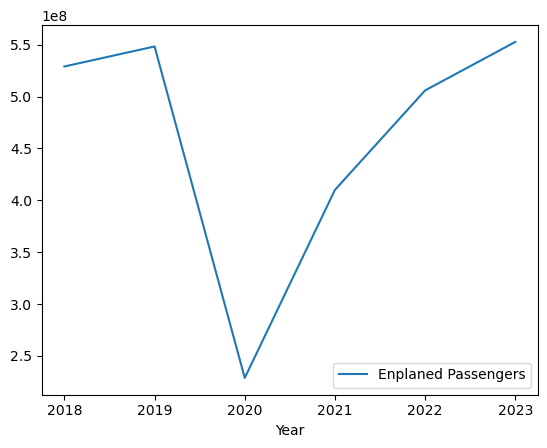

In [ ]:
df_summary[['Enplaned Passengers']].groupby('Year').sum().plot()

In [ ]:
df_year = df_summary.loc[2020:2022]
display(df_year)

No. of Flights  Enplaned Passengers
Year Month                                     
2020 1              416302             41752105
     2              391911             40355702
     3              441010             23034636
     4              202032              1998232
     5              115353              6311191
     6              146739             10659489
     7              233581             15291508
     8              251259             16600188
     9              220681             16569602
     10             238364             19410767
     11             247205             18090106
     12             252092             18699976
2021 1              239912             16852087
     2              221155             16770353
     3              293591             26546993
     4              299702             29632600
     5              330051             35832899
     6              357760             40142526
     7              383616             44467435
     8              383994             40913550
     9              360233             36749109
     10             378322             41151409
     11             369676             40670798
     12             370531             40318229
2022 1              360413             30947636
     2              332410             33068899
     3              376354             43403505
     4              369299             42776989
     5              385782             45203626
     6              382372             45114228
     7              392580             46242366
     8              391729             44769027
     9              372408             42672774
     10             383805             46174267
     11             365955             43113387
     12             371271             42453458

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>],
      dtype=object)

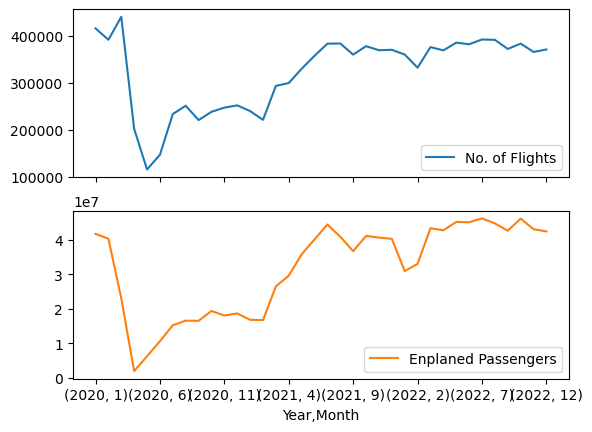

In [ ]:
df_monthly_sums = df_year[['No. of Flights',
                           'Enplaned Passengers']].groupby(['Year','Month']).sum()
display(df_monthly_sums)

df_monthly_sums.plot(subplots=True)

Average Delay (Minutes) Inflation Adjusted Average Fare ($)
Year Month                                                             
2020 1                         9.70                          397.527333
     2                        10.92                          397.527333
     3                         6.85                          397.527333
     4                         3.33                          315.796667
     5                         2.79                          315.796667
     6                         4.11                          315.796667
     7                         5.90                          281.694333
     8                         4.93                          281.694333
     9                         3.90                          281.694333
     10                        5.27                          296.781333
     11                        4.97                          296.781333
     12                        7.82                          296.781333
2021 1                         7.07                          294.409667
     2                        10.31                          294.409667
     3                         6.56                          294.409667
     4                         7.78                          334.408333
     5                         9.12                          334.408333
     6                        18.06                          334.408333
     7                        19.53                             346.096
     8                        17.31                             346.096
     9                        10.34                             346.096
     10                       12.45                          354.907333
     11                        9.92                          354.907333
     12                       15.30                          354.907333
2022 1                        14.37                             351.646
     2                        14.59                             351.646
     3                        15.76                             351.646
     4                        16.77                              414.84
     5                        15.79                              414.84
     6                        18.88                              414.84
     7                        17.44                             393.466
     8                        17.28                             393.466
     9                        11.91                             393.466
     10                       11.07                              403.94
     11                       13.34                              403.94
     12                       20.78                              403.94

array([<Axes: xlabel='Year,Month'>, <Axes: xlabel='Year,Month'>],
      dtype=object)

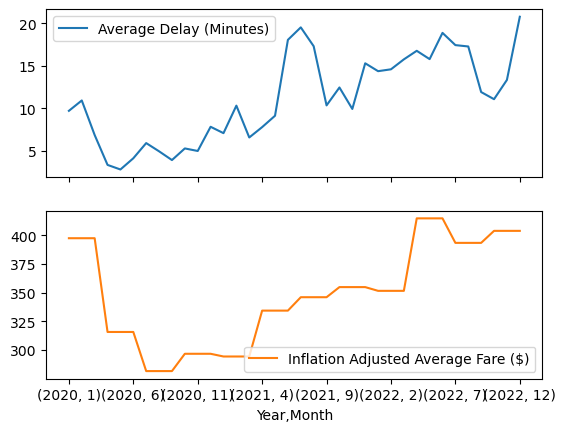

In [ ]:
df_monthly_means = df_year[['Average Delay (Minutes)',
                            'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)
display(df_monthly_means)

df_monthly_means.plot(subplots=True)